<br><br><center><h1 style="font-family: Arial; font-size:2em;color:#2467c0; font-style:bold">
Mini Project: World Indicator - Refuge Data Analysis & Visualization</h1></center>

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the Dataset into a Dataframe
WDI = pd.read_csv('WDIData.csv')

In [3]:
#Explorin the data
WDI.shape

(421080, 64)

In [4]:
#Explorin the data
WDI.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN,NaN,NaN


In [5]:
#Explorin the data
WDI.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'],
      dtype='object')

## Data Cleaning / Transformation for analysis
1. column headers are values , not variable names

We will perform Data cleaning steps to rectify the issue

In [6]:
melted_data = WDI.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
                      ,var_name='Year'
                      ,value_name='Value')

In [7]:
melted_data = melted_data[melted_data.Year!='Unnamed: 63']

In [8]:
melted_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,1960,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,1960,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1960,NaN


In [9]:
melted_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'Year', 'Value'],
      dtype='object')

## Now Lets filter the Data set with indicators picked for analysis

In [10]:
melted_data[melted_data['Indicator Name'].str.contains('Refugee')]['Indicator Name'].unique()

array(['Refugee population by country or territory of asylum',
       'Refugee population by country or territory of origin'],
      dtype=object)

In [11]:
ind1_Filter = (melted_data['Indicator Name'].str.contains('Refugee population by country or territory of origin'))
ind2_Filter = (melted_data['Indicator Name'].str.contains('Refugee population by country or territory of asylum'))


In [12]:
Asylum_Refugee_Data = melted_data[ind2_Filter]
Origin_Refugee_Data = melted_data[ind1_Filter]

## Now Lets filter the Data set with Only Valid countries

In [13]:
country_Filter_1 = (Asylum_Refugee_Data['Country Name'].str.contains( 'Afghanistan') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Albania') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Algeria') |
Asylum_Refugee_Data['Country Name'].str.contains( 'American Samoa') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Andorra') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Angola') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Antigua and Barbuda') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Argentina') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Armenia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Aruba') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Australia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Austria') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Azerbaijan') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Bahamas The') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Bahrain') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Bangladesh') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Barbados') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Belarus') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Belgium') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Belize') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Benin') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Bermuda') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Bhutan') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Bolivia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Bosnia and Herzegovina') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Botswana') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Brazil') |
Asylum_Refugee_Data['Country Name'].str.contains( 'British Virgin Islands') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Brunei Darussalam') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Bulgaria') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Burkina Faso') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Burundi') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Cabo Verde') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Cambodia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Cameroon') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Canada') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Cayman Islands') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Central African Republic') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Chad') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Channel Islands') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Chile') |
Asylum_Refugee_Data['Country Name'].str.contains( 'China') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Colombia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Comoros') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Congo Dem. Rep.') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Congo Rep.') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Costa Rica') |
Asylum_Refugee_Data['Country Name'].str.contains( "Cote d'Ivoire") |
Asylum_Refugee_Data['Country Name'].str.contains( 'Croatia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Cuba') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Curacao') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Cyprus') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Czech Republic') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Denmark') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Djibouti') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Dominica') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Dominican Republic') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Ecuador') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Egypt Arab Rep.') |
Asylum_Refugee_Data['Country Name'].str.contains( 'El Salvador') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Equatorial Guinea') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Eritrea') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Estonia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Eswatini') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Ethiopia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Faroe Islands') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Fiji') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Finland') |
Asylum_Refugee_Data['Country Name'].str.contains( 'France') |
Asylum_Refugee_Data['Country Name'].str.contains( 'French Polynesia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Gabon') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Gambia The') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Georgia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Germany') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Ghana') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Gibraltar') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Greece') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Greenland') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Grenada') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Guam') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Guatemala') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Guinea') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Guinea-Bissau') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Guyana') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Haiti') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Honduras') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Hong Kong SAR China') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Hungary') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Iceland') |
Asylum_Refugee_Data['Country Name'].str.contains( 'India') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Indonesia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Iran Islamic Rep.') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Iraq') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Ireland') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Isle of Man') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Israel') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Italy') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Jamaica') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Japan') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Jordan') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Kazakhstan') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Kenya') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Kiribati') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Korea Dem. People’s Rep.') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Korea Rep.') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Kosovo') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Kuwait') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Kyrgyz Republic') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Lao PDR') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Latvia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Lebanon') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Lesotho') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Liberia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Libya') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Liechtenstein') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Lithuania') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Luxembourg') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Macao SAR China') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Madagascar') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Malawi') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Malaysia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Maldives') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Mali') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Malta') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Marshall Islands') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Mauritania') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Mauritius') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Mexico') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Micronesia Fed. Sts.') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Moldova') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Monaco') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Mongolia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Montenegro') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Morocco') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Mozambique') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Myanmar') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Namibia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Nauru') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Nepal') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Netherlands') |
Asylum_Refugee_Data['Country Name'].str.contains( 'New Caledonia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'New Zealand') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Nicaragua') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Niger') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Nigeria') |
Asylum_Refugee_Data['Country Name'].str.contains( 'North Macedonia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Northern Mariana Islands') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Norway') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Oman') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Pakistan') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Palau') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Panama') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Papua New Guinea') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Paraguay') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Peru') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Philippines') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Poland') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Portugal') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Puerto Rico') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Qatar') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Romania') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Russian Federation') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Rwanda') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Samoa') |
Asylum_Refugee_Data['Country Name'].str.contains( 'San Marino') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Sao Tome and Principe') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Saudi Arabia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Senegal') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Serbia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Seychelles') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Sierra Leone') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Singapore') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Sint Maarten (Dutch part)') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Slovak Republic') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Slovenia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Solomon Islands') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Somalia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'South Africa') |
Asylum_Refugee_Data['Country Name'].str.contains( 'South Sudan') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Spain') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Sri Lanka') |
Asylum_Refugee_Data['Country Name'].str.contains( 'St. Kitts and Nevis') |
Asylum_Refugee_Data['Country Name'].str.contains( 'St. Lucia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'St. Martin (French part)') |
Asylum_Refugee_Data['Country Name'].str.contains( 'St. Vincent and the Grenadines') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Sudan') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Suriname') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Sweden') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Switzerland') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Syrian Arab Republic') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Tajikistan') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Tanzania') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Thailand') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Timor-Leste') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Togo') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Tonga') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Trinidad and Tobago') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Tunisia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Turkey') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Turkmenistan') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Turks and Caicos Islands') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Tuvalu') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Uganda') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Ukraine') |
Asylum_Refugee_Data['Country Name'].str.contains( 'United Arab Emirates') |
Asylum_Refugee_Data['Country Name'].str.contains( 'United Kingdom') |
Asylum_Refugee_Data['Country Name'].str.contains( 'United States') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Uruguay') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Uzbekistan') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Vanuatu') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Venezuela RB') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Vietnam') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Virgin Islands (U.S.)') |
Asylum_Refugee_Data['Country Name'].str.contains( 'West Bank and Gaza') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Yemen Rep.') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Zambia') |
Asylum_Refugee_Data['Country Name'].str.contains( 'Zimbabwe') 

                  )

C:\Users\SoumyaBukaiHome\Anaconda3\lib\site-packages\ipykernel_launcher.py:216: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
C:\Users\SoumyaBukaiHome\Anaconda3\lib\site-packages\ipykernel_launcher.py:216: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
C:\Users\SoumyaBukaiHome\Anaconda3\lib\site-packages\ipykernel_launcher.py:216: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [14]:
country_Filter_2 = (
Origin_Refugee_Data['Country Name'].str.contains( 'Afghanistan') |
Origin_Refugee_Data['Country Name'].str.contains( 'Albania') |
Origin_Refugee_Data['Country Name'].str.contains( 'Algeria') |
Origin_Refugee_Data['Country Name'].str.contains( 'American Samoa') |
Origin_Refugee_Data['Country Name'].str.contains( 'Andorra') |
Origin_Refugee_Data['Country Name'].str.contains( 'Angola') |
Origin_Refugee_Data['Country Name'].str.contains( 'Antigua and Barbuda') |
Origin_Refugee_Data['Country Name'].str.contains( 'Argentina') |
Origin_Refugee_Data['Country Name'].str.contains( 'Armenia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Aruba') |
Origin_Refugee_Data['Country Name'].str.contains( 'Australia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Austria') |
Origin_Refugee_Data['Country Name'].str.contains( 'Azerbaijan') |
Origin_Refugee_Data['Country Name'].str.contains( 'Bahamas The') |
Origin_Refugee_Data['Country Name'].str.contains( 'Bahrain') |
Origin_Refugee_Data['Country Name'].str.contains( 'Bangladesh') |
Origin_Refugee_Data['Country Name'].str.contains( 'Barbados') |
Origin_Refugee_Data['Country Name'].str.contains( 'Belarus') |
Origin_Refugee_Data['Country Name'].str.contains( 'Belgium') |
Origin_Refugee_Data['Country Name'].str.contains( 'Belize') |
Origin_Refugee_Data['Country Name'].str.contains( 'Benin') |
Origin_Refugee_Data['Country Name'].str.contains( 'Bermuda') |
Origin_Refugee_Data['Country Name'].str.contains( 'Bhutan') |
Origin_Refugee_Data['Country Name'].str.contains( 'Bolivia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Bosnia and Herzegovina') |
Origin_Refugee_Data['Country Name'].str.contains( 'Botswana') |
Origin_Refugee_Data['Country Name'].str.contains( 'Brazil') |
Origin_Refugee_Data['Country Name'].str.contains( 'British Virgin Islands') |
Origin_Refugee_Data['Country Name'].str.contains( 'Brunei Darussalam') |
Origin_Refugee_Data['Country Name'].str.contains( 'Bulgaria') |
Origin_Refugee_Data['Country Name'].str.contains( 'Burkina Faso') |
Origin_Refugee_Data['Country Name'].str.contains( 'Burundi') |
Origin_Refugee_Data['Country Name'].str.contains( 'Cabo Verde') |
Origin_Refugee_Data['Country Name'].str.contains( 'Cambodia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Cameroon') |
Origin_Refugee_Data['Country Name'].str.contains( 'Canada') |
Origin_Refugee_Data['Country Name'].str.contains( 'Cayman Islands') |
Origin_Refugee_Data['Country Name'].str.contains( 'Central African Republic') |
Origin_Refugee_Data['Country Name'].str.contains( 'Chad') |
Origin_Refugee_Data['Country Name'].str.contains( 'Channel Islands') |
Origin_Refugee_Data['Country Name'].str.contains( 'Chile') |
Origin_Refugee_Data['Country Name'].str.contains( 'China') |
Origin_Refugee_Data['Country Name'].str.contains( 'Colombia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Comoros') |
Origin_Refugee_Data['Country Name'].str.contains( 'Congo Dem. Rep.') |
Origin_Refugee_Data['Country Name'].str.contains( 'Congo Rep.') |
Origin_Refugee_Data['Country Name'].str.contains( 'Costa Rica') |
Origin_Refugee_Data['Country Name'].str.contains( "Cote d'Ivoire") |
Origin_Refugee_Data['Country Name'].str.contains( 'Croatia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Cuba') |
Origin_Refugee_Data['Country Name'].str.contains( 'Curacao') |
Origin_Refugee_Data['Country Name'].str.contains( 'Cyprus') |
Origin_Refugee_Data['Country Name'].str.contains( 'Czech Republic') |
Origin_Refugee_Data['Country Name'].str.contains( 'Denmark') |
Origin_Refugee_Data['Country Name'].str.contains( 'Djibouti') |
Origin_Refugee_Data['Country Name'].str.contains( 'Dominica') |
Origin_Refugee_Data['Country Name'].str.contains( 'Dominican Republic') |
Origin_Refugee_Data['Country Name'].str.contains( 'Ecuador') |
Origin_Refugee_Data['Country Name'].str.contains( 'Egypt Arab Rep.') |
Origin_Refugee_Data['Country Name'].str.contains( 'El Salvador') |
Origin_Refugee_Data['Country Name'].str.contains( 'Equatorial Guinea') |
Origin_Refugee_Data['Country Name'].str.contains( 'Eritrea') |
Origin_Refugee_Data['Country Name'].str.contains( 'Estonia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Eswatini') |
Origin_Refugee_Data['Country Name'].str.contains( 'Ethiopia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Faroe Islands') |
Origin_Refugee_Data['Country Name'].str.contains( 'Fiji') |
Origin_Refugee_Data['Country Name'].str.contains( 'Finland') |
Origin_Refugee_Data['Country Name'].str.contains( 'France') |
Origin_Refugee_Data['Country Name'].str.contains( 'French Polynesia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Gabon') |
Origin_Refugee_Data['Country Name'].str.contains( 'Gambia The') |
Origin_Refugee_Data['Country Name'].str.contains( 'Georgia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Germany') |
Origin_Refugee_Data['Country Name'].str.contains( 'Ghana') |
Origin_Refugee_Data['Country Name'].str.contains( 'Gibraltar') |
Origin_Refugee_Data['Country Name'].str.contains( 'Greece') |
Origin_Refugee_Data['Country Name'].str.contains( 'Greenland') |
Origin_Refugee_Data['Country Name'].str.contains( 'Grenada') |
Origin_Refugee_Data['Country Name'].str.contains( 'Guam') |
Origin_Refugee_Data['Country Name'].str.contains( 'Guatemala') |
Origin_Refugee_Data['Country Name'].str.contains( 'Guinea') |
Origin_Refugee_Data['Country Name'].str.contains( 'Guinea-Bissau') |
Origin_Refugee_Data['Country Name'].str.contains( 'Guyana') |
Origin_Refugee_Data['Country Name'].str.contains( 'Haiti') |
Origin_Refugee_Data['Country Name'].str.contains( 'Honduras') |
Origin_Refugee_Data['Country Name'].str.contains( 'Hong Kong SAR China') |
Origin_Refugee_Data['Country Name'].str.contains( 'Hungary') |
Origin_Refugee_Data['Country Name'].str.contains( 'Iceland') |
Origin_Refugee_Data['Country Name'].str.contains( 'India') |
Origin_Refugee_Data['Country Name'].str.contains( 'Indonesia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Iran Islamic Rep.') |
Origin_Refugee_Data['Country Name'].str.contains( 'Iraq') |
Origin_Refugee_Data['Country Name'].str.contains( 'Ireland') |
Origin_Refugee_Data['Country Name'].str.contains( 'Isle of Man') |
Origin_Refugee_Data['Country Name'].str.contains( 'Israel') |
Origin_Refugee_Data['Country Name'].str.contains( 'Italy') |
Origin_Refugee_Data['Country Name'].str.contains( 'Jamaica') |
Origin_Refugee_Data['Country Name'].str.contains( 'Japan') |
Origin_Refugee_Data['Country Name'].str.contains( 'Jordan') |
Origin_Refugee_Data['Country Name'].str.contains( 'Kazakhstan') |
Origin_Refugee_Data['Country Name'].str.contains( 'Kenya') |
Origin_Refugee_Data['Country Name'].str.contains( 'Kiribati') |
Origin_Refugee_Data['Country Name'].str.contains( 'Korea Dem. People’s Rep.') |
Origin_Refugee_Data['Country Name'].str.contains( 'Korea Rep.') |
Origin_Refugee_Data['Country Name'].str.contains( 'Kosovo') |
Origin_Refugee_Data['Country Name'].str.contains( 'Kuwait') |
Origin_Refugee_Data['Country Name'].str.contains( 'Kyrgyz Republic') |
Origin_Refugee_Data['Country Name'].str.contains( 'Lao PDR') |
Origin_Refugee_Data['Country Name'].str.contains( 'Latvia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Lebanon') |
Origin_Refugee_Data['Country Name'].str.contains( 'Lesotho') |
Origin_Refugee_Data['Country Name'].str.contains( 'Liberia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Libya') |
Origin_Refugee_Data['Country Name'].str.contains( 'Liechtenstein') |
Origin_Refugee_Data['Country Name'].str.contains( 'Lithuania') |
Origin_Refugee_Data['Country Name'].str.contains( 'Luxembourg') |
Origin_Refugee_Data['Country Name'].str.contains( 'Macao SAR China') |
Origin_Refugee_Data['Country Name'].str.contains( 'Madagascar') |
Origin_Refugee_Data['Country Name'].str.contains( 'Malawi') |
Origin_Refugee_Data['Country Name'].str.contains( 'Malaysia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Maldives') |
Origin_Refugee_Data['Country Name'].str.contains( 'Mali') |
Origin_Refugee_Data['Country Name'].str.contains( 'Malta') |
Origin_Refugee_Data['Country Name'].str.contains( 'Marshall Islands') |
Origin_Refugee_Data['Country Name'].str.contains( 'Mauritania') |
Origin_Refugee_Data['Country Name'].str.contains( 'Mauritius') |
Origin_Refugee_Data['Country Name'].str.contains( 'Mexico') |
Origin_Refugee_Data['Country Name'].str.contains( 'Micronesia Fed. Sts.') |
Origin_Refugee_Data['Country Name'].str.contains( 'Moldova') |
Origin_Refugee_Data['Country Name'].str.contains( 'Monaco') |
Origin_Refugee_Data['Country Name'].str.contains( 'Mongolia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Montenegro') |
Origin_Refugee_Data['Country Name'].str.contains( 'Morocco') |
Origin_Refugee_Data['Country Name'].str.contains( 'Mozambique') |
Origin_Refugee_Data['Country Name'].str.contains( 'Myanmar') |
Origin_Refugee_Data['Country Name'].str.contains( 'Namibia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Nauru') |
Origin_Refugee_Data['Country Name'].str.contains( 'Nepal') |
Origin_Refugee_Data['Country Name'].str.contains( 'Netherlands') |
Origin_Refugee_Data['Country Name'].str.contains( 'New Caledonia') |
Origin_Refugee_Data['Country Name'].str.contains( 'New Zealand') |
Origin_Refugee_Data['Country Name'].str.contains( 'Nicaragua') |
Origin_Refugee_Data['Country Name'].str.contains( 'Niger') |
Origin_Refugee_Data['Country Name'].str.contains( 'Nigeria') |
Origin_Refugee_Data['Country Name'].str.contains( 'North Macedonia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Northern Mariana Islands') |
Origin_Refugee_Data['Country Name'].str.contains( 'Norway') |
Origin_Refugee_Data['Country Name'].str.contains( 'Oman') |
Origin_Refugee_Data['Country Name'].str.contains( 'Pakistan') |
Origin_Refugee_Data['Country Name'].str.contains( 'Palau') |
Origin_Refugee_Data['Country Name'].str.contains( 'Panama') |
Origin_Refugee_Data['Country Name'].str.contains( 'Papua New Guinea') |
Origin_Refugee_Data['Country Name'].str.contains( 'Paraguay') |
Origin_Refugee_Data['Country Name'].str.contains( 'Peru') |
Origin_Refugee_Data['Country Name'].str.contains( 'Philippines') |
Origin_Refugee_Data['Country Name'].str.contains( 'Poland') |
Origin_Refugee_Data['Country Name'].str.contains( 'Portugal') |
Origin_Refugee_Data['Country Name'].str.contains( 'Puerto Rico') |
Origin_Refugee_Data['Country Name'].str.contains( 'Qatar') |
Origin_Refugee_Data['Country Name'].str.contains( 'Romania') |
Origin_Refugee_Data['Country Name'].str.contains( 'Russian Federation') |
Origin_Refugee_Data['Country Name'].str.contains( 'Rwanda') |
Origin_Refugee_Data['Country Name'].str.contains( 'Samoa') |
Origin_Refugee_Data['Country Name'].str.contains( 'San Marino') |
Origin_Refugee_Data['Country Name'].str.contains( 'Sao Tome and Principe') |
Origin_Refugee_Data['Country Name'].str.contains( 'Saudi Arabia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Senegal') |
Origin_Refugee_Data['Country Name'].str.contains( 'Serbia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Seychelles') |
Origin_Refugee_Data['Country Name'].str.contains( 'Sierra Leone') |
Origin_Refugee_Data['Country Name'].str.contains( 'Singapore') |
Origin_Refugee_Data['Country Name'].str.contains( 'Sint Maarten (Dutch part)') |
Origin_Refugee_Data['Country Name'].str.contains( 'Slovak Republic') |
Origin_Refugee_Data['Country Name'].str.contains( 'Slovenia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Solomon Islands') |
Origin_Refugee_Data['Country Name'].str.contains( 'Somalia') |
Origin_Refugee_Data['Country Name'].str.contains( 'South Africa') |
Origin_Refugee_Data['Country Name'].str.contains( 'South Sudan') |
Origin_Refugee_Data['Country Name'].str.contains( 'Spain') |
Origin_Refugee_Data['Country Name'].str.contains( 'Sri Lanka') |
Origin_Refugee_Data['Country Name'].str.contains( 'St. Kitts and Nevis') |
Origin_Refugee_Data['Country Name'].str.contains( 'St. Lucia') |
Origin_Refugee_Data['Country Name'].str.contains( 'St. Martin (French part)') |
Origin_Refugee_Data['Country Name'].str.contains( 'St. Vincent and the Grenadines') |
Origin_Refugee_Data['Country Name'].str.contains( 'Sudan') |
Origin_Refugee_Data['Country Name'].str.contains( 'Suriname') |
Origin_Refugee_Data['Country Name'].str.contains( 'Sweden') |
Origin_Refugee_Data['Country Name'].str.contains( 'Switzerland') |
Origin_Refugee_Data['Country Name'].str.contains( 'Syrian Arab Republic') |
Origin_Refugee_Data['Country Name'].str.contains( 'Tajikistan') |
Origin_Refugee_Data['Country Name'].str.contains( 'Tanzania') |
Origin_Refugee_Data['Country Name'].str.contains( 'Thailand') |
Origin_Refugee_Data['Country Name'].str.contains( 'Timor-Leste') |
Origin_Refugee_Data['Country Name'].str.contains( 'Togo') |
Origin_Refugee_Data['Country Name'].str.contains( 'Tonga') |
Origin_Refugee_Data['Country Name'].str.contains( 'Trinidad and Tobago') |
Origin_Refugee_Data['Country Name'].str.contains( 'Tunisia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Turkey') |
Origin_Refugee_Data['Country Name'].str.contains( 'Turkmenistan') |
Origin_Refugee_Data['Country Name'].str.contains( 'Turks and Caicos Islands') |
Origin_Refugee_Data['Country Name'].str.contains( 'Tuvalu') |
Origin_Refugee_Data['Country Name'].str.contains( 'Uganda') |
Origin_Refugee_Data['Country Name'].str.contains( 'Ukraine') |
Origin_Refugee_Data['Country Name'].str.contains( 'United Arab Emirates') |
Origin_Refugee_Data['Country Name'].str.contains( 'United Kingdom') |
Origin_Refugee_Data['Country Name'].str.contains( 'United States') |
Origin_Refugee_Data['Country Name'].str.contains( 'Uruguay') |
Origin_Refugee_Data['Country Name'].str.contains( 'Uzbekistan') |
Origin_Refugee_Data['Country Name'].str.contains( 'Vanuatu') |
Origin_Refugee_Data['Country Name'].str.contains( 'Venezuela RB') |
Origin_Refugee_Data['Country Name'].str.contains( 'Vietnam') |
Origin_Refugee_Data['Country Name'].str.contains( 'Virgin Islands (U.S.)') |
Origin_Refugee_Data['Country Name'].str.contains( 'West Bank and Gaza') |
Origin_Refugee_Data['Country Name'].str.contains( 'Yemen Rep.') |
Origin_Refugee_Data['Country Name'].str.contains( 'Zambia') |
Origin_Refugee_Data['Country Name'].str.contains( 'Zimbabwe') 



)

C:\Users\SoumyaBukaiHome\Anaconda3\lib\site-packages\ipykernel_launcher.py:217: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
C:\Users\SoumyaBukaiHome\Anaconda3\lib\site-packages\ipykernel_launcher.py:217: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
C:\Users\SoumyaBukaiHome\Anaconda3\lib\site-packages\ipykernel_launcher.py:217: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [15]:
Asylum_Refugee_Data_country_Filter =  Asylum_Refugee_Data[country_Filter_1]
Origin_Refugee_Data_country_Filter =  Origin_Refugee_Data[country_Filter_2]

In [16]:
Asylum_Refugee_Data_country_Filter.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
76284,Afghanistan,AFG,Refugee population by country or territory of ...,SM.POP.REFG,1960,NaN
77879,Albania,ALB,Refugee population by country or territory of ...,SM.POP.REFG,1960,NaN
79474,Algeria,DZA,Refugee population by country or territory of ...,SM.POP.REFG,1960,NaN
81069,American Samoa,ASM,Refugee population by country or territory of ...,SM.POP.REFG,1960,NaN
82664,Andorra,AND,Refugee population by country or territory of ...,SM.POP.REFG,1960,NaN


In [17]:
Origin_Refugee_Data_country_Filter.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
76285,Afghanistan,AFG,Refugee population by country or territory of ...,SM.POP.REFG.OR,1960,NaN
77880,Albania,ALB,Refugee population by country or territory of ...,SM.POP.REFG.OR,1960,NaN
79475,Algeria,DZA,Refugee population by country or territory of ...,SM.POP.REFG.OR,1960,NaN
81070,American Samoa,ASM,Refugee population by country or territory of ...,SM.POP.REFG.OR,1960,NaN
82665,Andorra,AND,Refugee population by country or territory of ...,SM.POP.REFG.OR,1960,NaN


# Now Lets Filter the Data as > 1989

In [18]:
Origin_Refugee_Data_final = Origin_Refugee_Data_country_Filter[Origin_Refugee_Data_country_Filter.Year > '1989']

In [19]:
Asylum_Refugee_Data_final = Asylum_Refugee_Data_country_Filter[Asylum_Refugee_Data_country_Filter.Year > '1989']

In [20]:
Origin_Refugee_Data_final.isnull().sum()

Country Name         0
Country Code         0
Indicator Name       0
Indicator Code       0
Year                 0
Value             1190
dtype: int64

In [21]:
Origin_Refugee_Data_final = Origin_Refugee_Data_final.dropna()

In [22]:
Asylum_Refugee_Data_final = Asylum_Refugee_Data_final.dropna()

In [23]:
Origin_Refugee_Data_final.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
Year              0
Value             0
dtype: int64

In [24]:
Asylum_Refugee_Data_final.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
Year              0
Value             0
dtype: int64

# (1) Visualization - count of refugee by Million by country - Top 10

In [25]:
del Origin_Refugee_Data_final['Country Code']
del Origin_Refugee_Data_final['Indicator Name']
del Origin_Refugee_Data_final['Indicator Code']

In [26]:
del Asylum_Refugee_Data_final['Country Code']
del Asylum_Refugee_Data_final['Indicator Name']
del Asylum_Refugee_Data_final['Indicator Code']

In [27]:
Origin_Refugee_Data_by_country = Origin_Refugee_Data_final.groupby(['Country Name'],as_index=False).sum().sort_values('Value',ascending=False)

In [28]:
Origin_Refugee_Data_by_country['Val_in_M'] = Origin_Refugee_Data_by_country['Value'] // 1000000

In [29]:
Asylum_Refugee_Data_by_country = Asylum_Refugee_Data_final.groupby(['Country Name'],as_index=False).sum().sort_values('Value',ascending=False)

In [30]:
Asylum_Refugee_Data_by_country['Val_in_M'] = Asylum_Refugee_Data_by_country['Value'] // 1000000

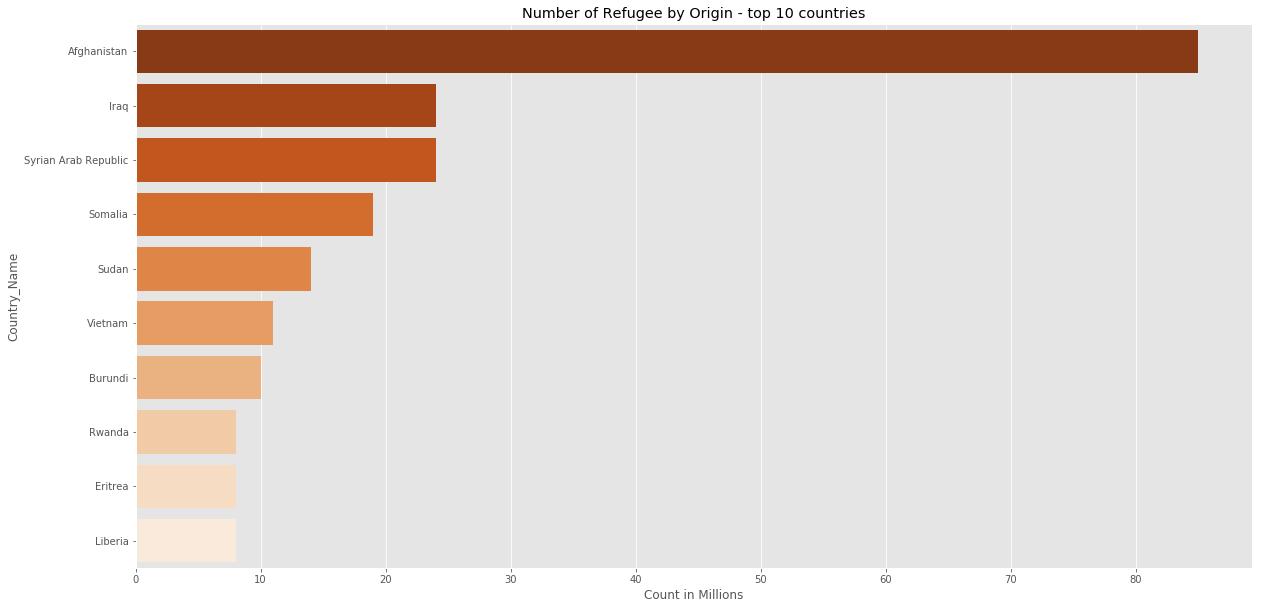

In [31]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.title("Number of Refugee by Origin - top 10 countries")
ax = sns.barplot(x="Val_in_M",y="Country Name",data=Origin_Refugee_Data_by_country.head(10),palette="Oranges_r")
ax.set(xlabel='Count in Millions',ylabel='Country_Name')
plt.show()

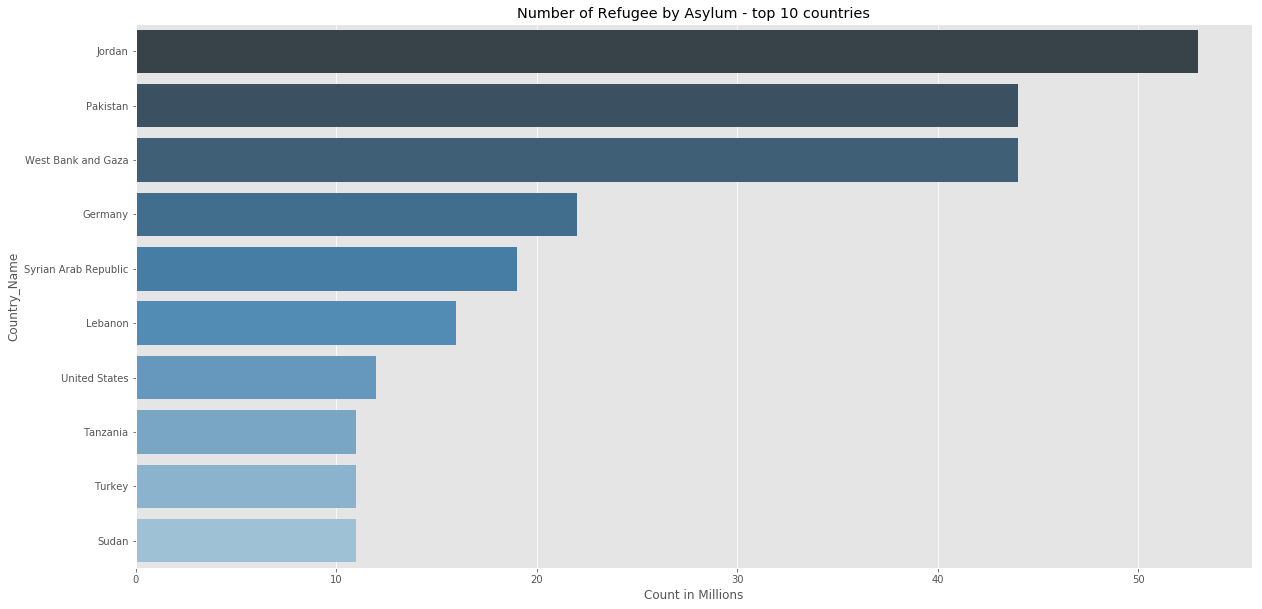

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.title("Number of Refugee by Asylum - top 10 countries")
ax = sns.barplot(x="Val_in_M",y="Country Name",data=Asylum_Refugee_Data_by_country.head(10),palette="Blues_d")
ax.set(xlabel='Count in Millions',ylabel='Country_Name')
plt.show()

# (2) Visualization - Trend of Refugee count in Millions

In [33]:
Origin_Refugee_Data_by_Year = Origin_Refugee_Data_final.groupby(['Year'],as_index=False).sum().sort_values('Year',ascending=True)

In [34]:
Origin_Refugee_Data_by_Year['Val_in_M'] = Origin_Refugee_Data_by_Year['Value'] // 1000000

In [35]:
Asylum_Refugee_Data_by_Year = Asylum_Refugee_Data_final.groupby(['Year'],as_index=False).sum().sort_values('Year',ascending=True)

In [36]:
Asylum_Refugee_Data_by_Year['Val_in_M'] = Asylum_Refugee_Data_by_Year['Value'] // 1000000

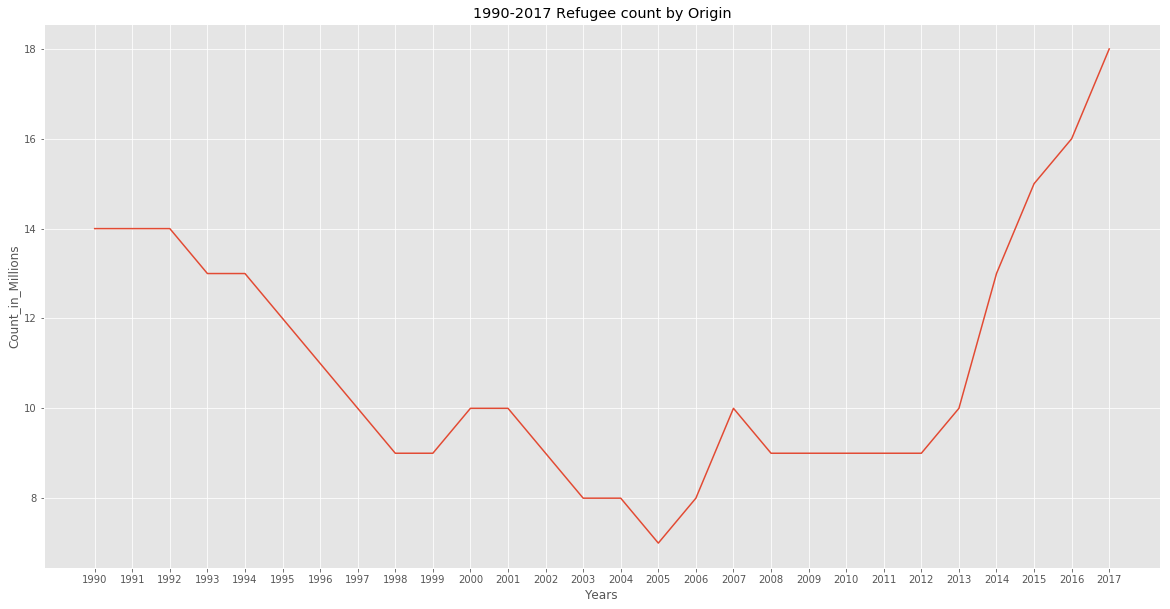

In [37]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.title("1990-2017 Refugee count by Origin")
ax = sns.lineplot(x='Year',y='Val_in_M',data=Origin_Refugee_Data_by_Year,palette="Blues_d")
ax.set(xlabel='Years',ylabel='Count_in_Millions')
plt.show()

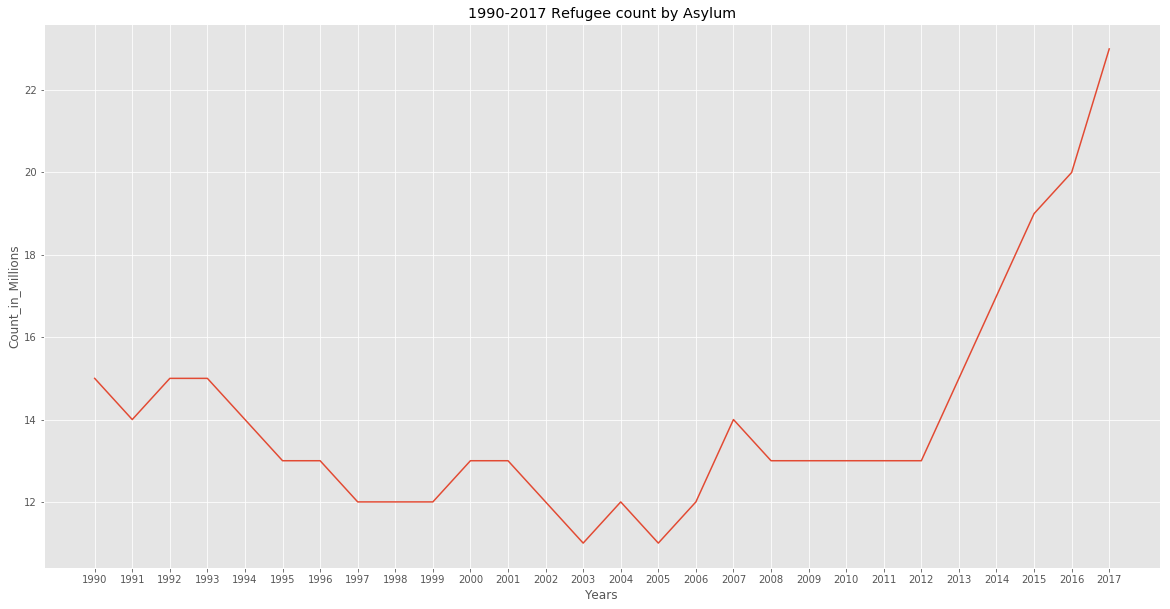

In [38]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.title("1990-2017 Refugee count by Asylum")
ax = sns.lineplot(x='Year',y='Val_in_M',data=Asylum_Refugee_Data_by_Year,palette="Blues_d")
ax.set(xlabel='Years',ylabel='Count_in_Millions')
plt.show()

In [40]:
Origin_Refugee_Data_final.head()

,Country Name,Year,Value
12708685,Afghanistan,1990,6339095.0
12710280,Albania,1990,1822.0
12711875,Algeria,1990,19.0
12716660,Angola,1990,407760.0
12719850,Argentina,1990,334.0


# (3) Visualization - Trend of Refugee count in Top 5 countries

In [41]:
Top_5_counties_by_Origin = Origin_Refugee_Data_by_country.head(5)['Country Name'].tolist()

In [42]:
Top_5_counties_by_Asylum = Asylum_Refugee_Data_by_country.head(5)['Country Name'].tolist()

In [43]:
Yearly_data_top5_by_origin= Origin_Refugee_Data_final[Origin_Refugee_Data_final['Country Name'].isin(Top_5_counties_by_Origin)]

In [44]:
Yearly_data_top5_by_asyslum= Asylum_Refugee_Data_final[Asylum_Refugee_Data_final['Country Name'].isin(Top_5_counties_by_Asylum)]

In [58]:
Yearly_data_top5_by_asyslum['Val_in_M'] = Yearly_data_top5_by_asyslum['Value'] // 100000
Yearly_data_top5_by_origin['Val_in_M'] = Yearly_data_top5_by_origin['Value'] // 100000

C:\Users\SoumyaBukaiHome\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\SoumyaBukaiHome\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


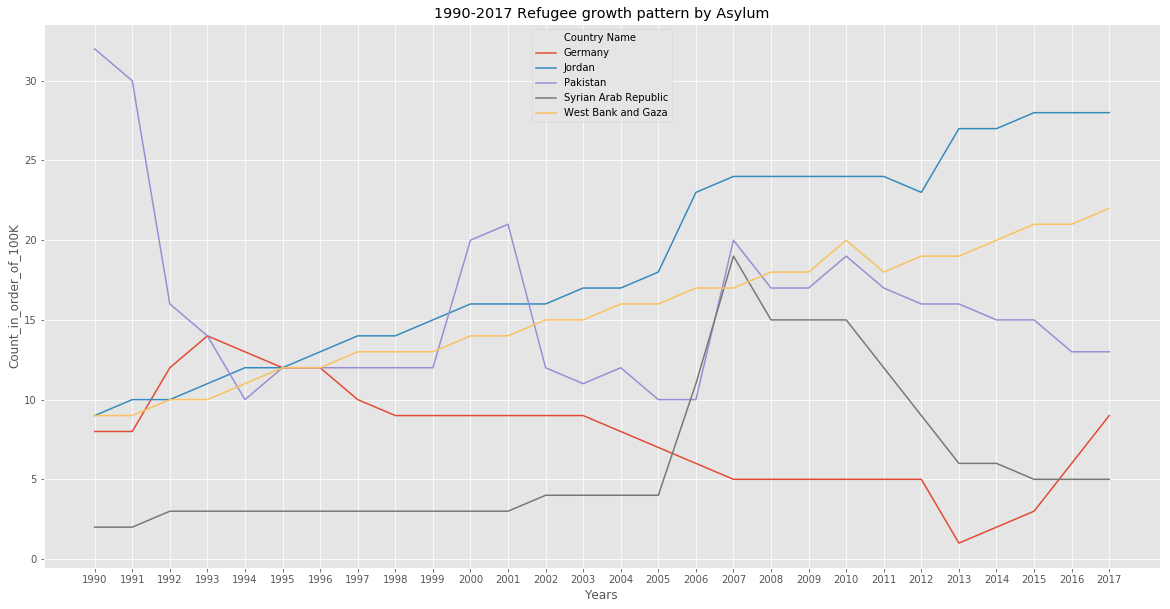

In [66]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.title("1990-2017 Refugee growth pattern by Asylum")
ax = sns.lineplot(x='Year',y='Val_in_M',hue='Country Name',data=Yearly_data_top5_by_asyslum)
ax.set(xlabel='Years',ylabel='Count_in_order_of_100K')
plt.show()

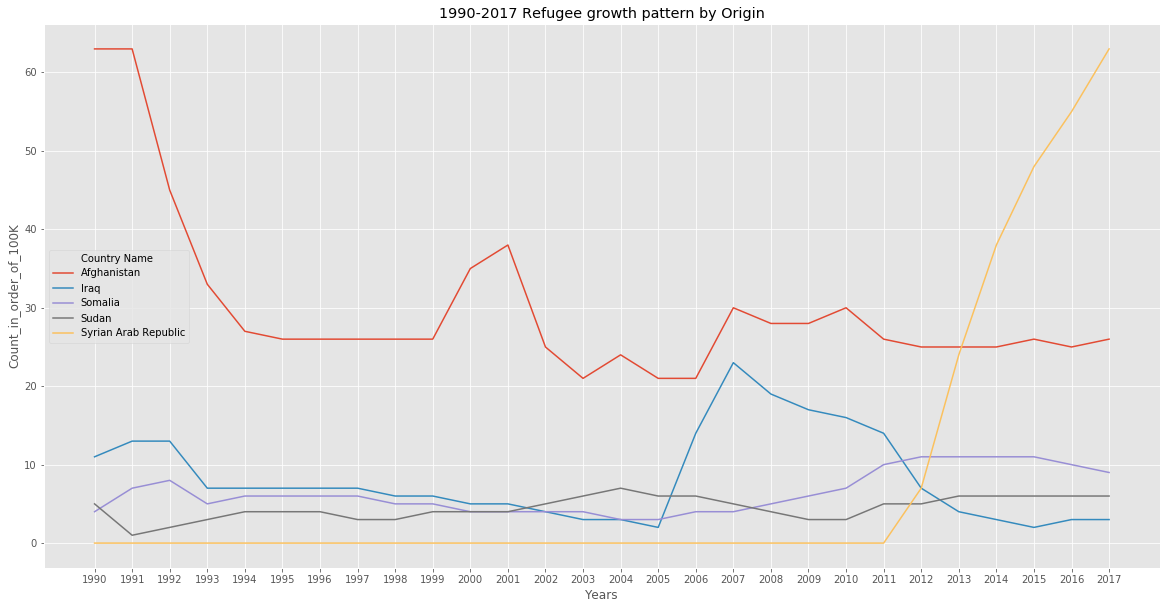

In [65]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.title("1990-2017 Refugee growth pattern by Origin")
ax = sns.lineplot(x='Year',y='Val_in_M',hue='Country Name',data=Yearly_data_top5_by_origin)
ax.set(xlabel='Years',ylabel='Count_in_order_of_100K')
plt.show()

# (4) Visualization - USA

In [47]:
Yearly_data_USA= Asylum_Refugee_Data_final[Asylum_Refugee_Data_final['Country Name'].isin(['United States'])]

In [62]:
Yearly_data_USA['Val_in_M'] = Yearly_data_USA['Value'] //100000

C:\Users\SoumyaBukaiHome\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


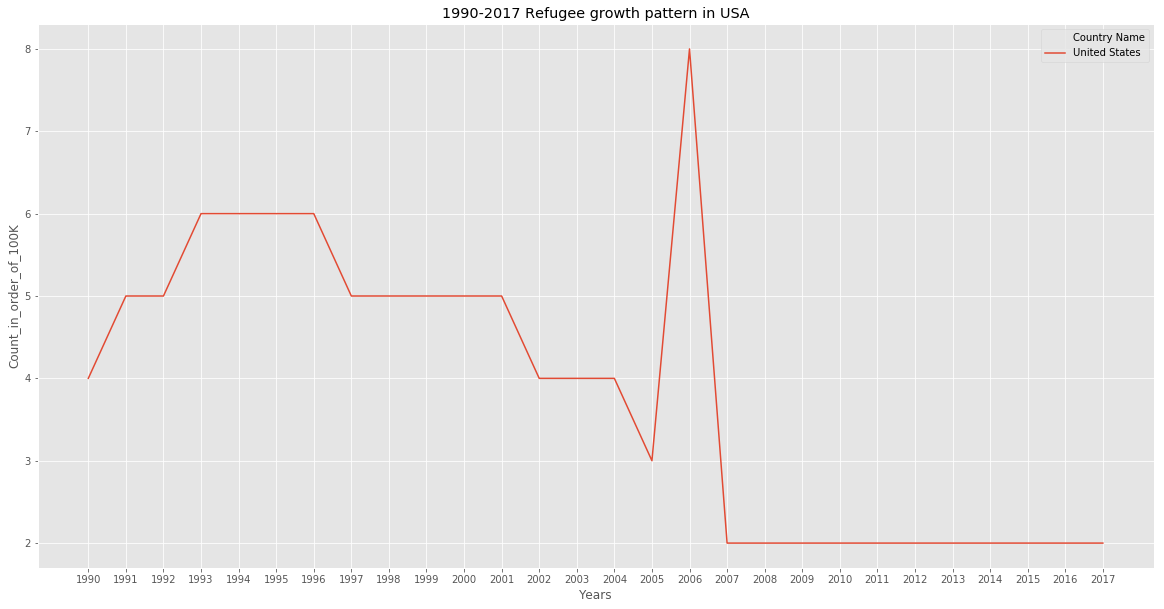

In [64]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.title("1990-2017 Refugee growth pattern in USA")
ax = sns.lineplot(x='Year',y='Val_in_M',hue='Country Name',data=Yearly_data_USA)
ax.set(xlabel='Years',ylabel='Count_in_order_of_100K')
plt.show()

# How Much % Refugees coming to USA vs Genrmany ?

In [49]:
Total_Refugee_count = Asylum_Refugee_Data_by_country['Value'].sum()

In [50]:
Total_Refugee_count

404293880.0

In [51]:
#Lets Cals the % for top 10 countries
Top_10_Asylum = Asylum_Refugee_Data_by_country.head(10)

In [52]:
Top_10_Asylum['pctg'] = (Top_10_Asylum['Value'] / Total_Refugee_count)*100

C:\Users\SoumyaBukaiHome\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


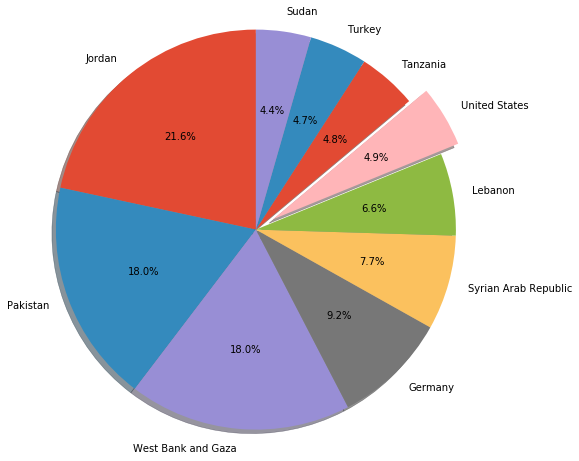

In [53]:
explode = (0, 0, 0, 0,0,0,0.1,0,0,0)
fig1, ax1 = plt.subplots()
fig1.set_size_inches(8,8)
ax1.pie(Top_10_Asylum['pctg'], explode=explode,labels=Top_10_Asylum['Country Name'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()